In [1]:
import pandas as pd

In [4]:
train_dataset = pd.read_csv('data/train_data.csv')[['text', 'label']]

In [5]:
# split the dataset
train_dataset.text = train_dataset.text.str.replace('\n', ' ')
class_0 = train_dataset[train_dataset['label'] == 0]
class_1 = train_dataset[train_dataset['label'] == 1]

# count
num_class_0 = len(class_0)
num_class_1 = len(class_1)

min_num = min(num_class_0, num_class_1)

# perform random sampling on bigger class
if num_class_0 > min_num:
    class_0 = class_0.sample(n=min_num, random_state=42)  # random_state
elif num_class_1 > min_num:
    class_1 = class_1.sample(n=min_num, random_state=42)

balanced_train_dataset = pd.concat([class_0, class_1])

# random shuffle
balanced_train_dataset = balanced_train_dataset.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_train_dataset

,text,label
0,Title: The Perks of Limiting Car Usage: A Shif...,1
1,I should agree because it can make your grades...,0
2,"Every school has a summer break, during summer...",0
3,"Dear Principal, The students should be requir...",0
4,"Dear Principal, I think everyone should donat...",0
...,...,...
34995,"In the article "" Making Mona Lisa Smile,"" the ...",0
34996,"Hello,I am Luke Bomberger and here to convince...",0
34997,Not a single spacecraft has touched down on Ve...,0
34998,When doing projects over the summer usually te...,0


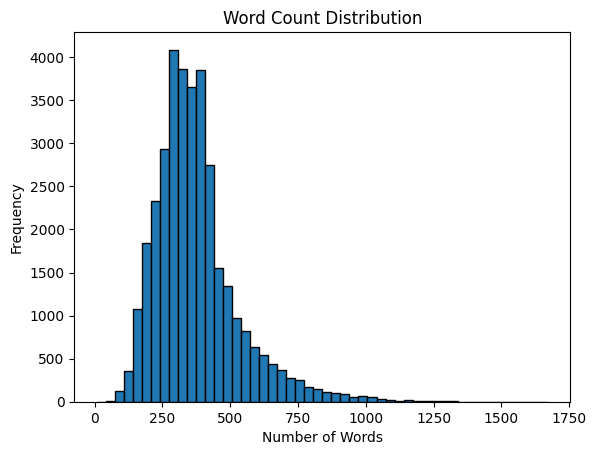

In [6]:
import matplotlib.pyplot as plt
import re

# 分词并计数单词个数
word_counts = [len(re.findall(r'\w+', text)) for text in balanced_train_dataset.text]

# 绘制直方图
plt.hist(word_counts, bins=50, edgecolor='black')
plt.title('Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#train_dataset = concat([train_dataset.query('label==0').sample(48475), train_dataset.query('label==1')])

In [7]:
balanced_train_dataset.label.value_counts()

1    17500
0    17500
Name: label, dtype: int64

In [8]:
X_train = balanced_train_dataset.text
y_train = balanced_train_dataset.label

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
!pip install -q language-tool-python --no-index --find-links ../input/daigt-misc/
!pip install -q regex
!mkdir -p /root/.cache/language_tool_python/
!cp -r /kaggle/input/daigt-misc/lang57/LanguageTool-5.7 /root/.cache/language_tool_python/LanguageTool-5.7

ERROR: Could not find a version that satisfies the requirement language-tool-python (from versions: none)
ERROR: No matching distribution found for language-tool-python
mkdir: /root: Read-only file system
cp: /kaggle/input/daigt-misc/lang57/LanguageTool-5.7: No such file or directory


In [9]:
!pip3 install -U regex
!pip3 install -U scikit-learn

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import make_scorer, accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from concurrent.futures import ProcessPoolExecutor
from sklearn.naive_bayes import MultinomialNB
seed = 66

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
import language_tool_python
import regex as re

In [20]:
tool = language_tool_python.LanguageTool('en-US')
def correct_sentence(sentence):
    return tool.correct(sentence)
def correct_df(df):
    with ProcessPoolExecutor() as executor:
        df['text'] = list(executor.map(correct_sentence, df['text']))

NameError: name 'language_tool_python' is not defined

In [21]:
train = balanced_train_dataset
train['text'] = train['text'].str.replace('\n', '')
# df = pd.concat([train['text'], test['text']], axis=0)
df = train['text']

In [22]:
vectorizer = TfidfVectorizer(ngram_range=(3, 5),tokenizer=lambda x: re.findall(r'[^\W]+', x), token_pattern=None, strip_accents='unicode')
vectorizer = vectorizer.fit(train['text'])
X = vectorizer.transform(df)

NameError: name 'TfidfVectorizer' is not defined

In [ ]:
lr=LogisticRegression(verbose = 1)
clf = MultinomialNB(alpha=0.02)
sgd_model = SGDClassifier(max_iter=8000, tol=1e-3, loss="modified_huber")
sgd_model2 = SGDClassifier(max_iter=12000, tol=5e-4, loss="modified_huber", class_weight="balanced")
sgd_model3 = SGDClassifier(max_iter=15000, tol=3e-4, loss="modified_huber", early_stopping=True)

In [ ]:
ensemble = VotingClassifier(
    estimators=[('lr', lr), ('mnb', clf), ('sgd', sgd_model), ('sgd2', sgd_model2), ('sgd3', sgd_model3)],
    weights=[0.20, 0.20, 0.20, 0.20, 0.20],
    voting='soft',
    verbose=1
)
ensemble.fit(X[:train.shape[0]], train.label)

In [ ]:
test1 = pd.read_csv('/kaggle/input/567testdata/Mistral7B_CME_v7_15_percent_corruption.csv')[['text', 'generated']].rename(columns={'generated' : 'label'})
test2 = class_0_test

test_dataset = pd.concat([test1, test2])
# correct_df(test_dataset)

# split the dataset
test_dataset.text = test_dataset.text.str.replace('\n', ' ')
class_0 = test_dataset[test_dataset['label'] == 0]
class_1 = test_dataset[test_dataset['label'] == 1]

# 确定两个类别的样本数量
num_class_0 = len(class_0)
num_class_1 = len(class_1)

# 计算较小的样本数量
min_num = min(num_class_0, num_class_1)

# 对样本较多的类别进行随机抽样
if num_class_0 > min_num:
    class_0 = class_0.sample(n=min_num, random_state=42)  # random_state 确保结果的可复现性
elif num_class_1 > min_num:
    class_1 = class_1.sample(n=min_num, random_state=42)

# 合并数据集
balanced_test_dataset = pd.concat([class_0, class_1])

# 如果需要，可以打乱数据集的顺序
balanced_test_dataset = balanced_test_dataset.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_test_dataset

In [ ]:
X_test = vectorizer.transform(balanced_test_dataset['text'])
y_test = balanced_test_dataset['label']

In [ ]:
y_pred_prob = ensemble.predict_proba(X_test)[:,1]
y_pred = ensemble.predict(X_test)

In [ ]:
# from sklearn.metrics import roc_auc_score, accuracy_score
# auc = roc_auc_score(test[''], y_pred_prob)
# print("AUC:", auc)

from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, roc_curve
# Calculate F1 score
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("AUCROC: ", roc_auc)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 8))
plt.plot(fpr, label=f'AUC-ROC = {roc_auc:.2f}')
plt.plot(tpr)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
false_positives = sum((y_test[i] == 0) and (y_pred[i] == 1) for i in range(len(y_test)))
true_positives = sum((y_test[i] == 1) and (y_pred[i] == 1) for i in range(len(y_test)))
false_negatives = sum((y_test[i] == 1) and (y_pred[i] == 0) for i in range(len(y_test)))
true_negatives = sum((y_test[i] == 0) and (y_pred[i] == 0) for i in range(len(y_test)))
print(false_positives)
print(true_positives)
print(false_negatives)
print(true_negatives)
print(len(y_test))